In [133]:
import sys
from fractions import Fraction
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as LA

sys.set_int_max_str_digits(0)

#define the function to find P(n) using the recurrence relation
def find_p(n):
    p1_num = 1
    p1_den = 1
    p2_num = 1
    p2_den = 2
    vals = [p1_num/p1_den]
    if n == 1:
        pn_num = p1_num
        pn_den = p1_den
    elif n == 2:
        pn_num = p2_num
        pn_den = p2_den
        vals.append(p2_num/p2_den)
    else:
        pn_den = 2**(n-1)
        vals.append(p2_num/p2_den)
        for n in range(0,n-2):
            pn_num = 2*p1_num + p2_num
            vals.append(pn_num/2**(n+2))
            p1_num = p2_num
            p2_num = pn_num
    print(Fraction(pn_num, pn_den))
    return vals

#define the function to plot the sequence P(n) up to n
def plot(vals):
    valsarray = np.array(vals)
    subs = np.arange(1,len(vals)+1)
    plt.semilogy(subs,valsarray)
    plt.savefig('graph.png')

11184811/16777216


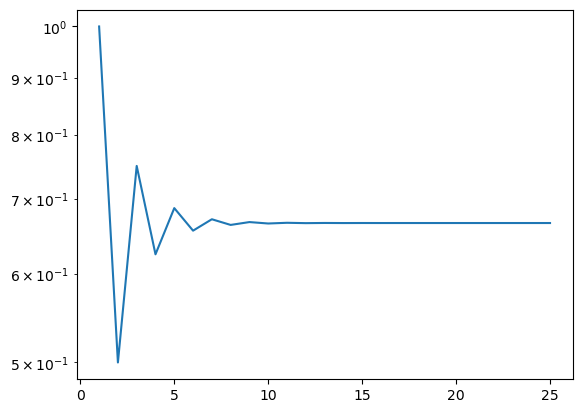

In [134]:
#find P(25) using the recurrence relation
vals = find_p(25)

#plot the sequence P(n) up to n=25
plot(vals)

In [135]:
#define the function to find the solution to the recurrence relation
def sol(p1,p2):
    A = np.array([[p1,p2],[1,0]])
    lam, P = np.linalg.eig(A)
    
    B = np.array([[1,1],lam])
    b = np.array([1,1/2])
    C = LA.solve(B,b)
    
    print(lam)
    print(C)

In [136]:
#find the solution to the recurrence relation for the unbiased coin case
sol(1/2,1/2)

[ 1.  -0.5]
[0.66666667 0.33333333]
